In [ ]:
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=5bd9b2b099a03785d0fdbfaaaaebb5fa3914dfcb27f268ca6745726f0b5f20ce
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=900d3ac9b5f52064eccd0da4eda0b975fffeb4a52c2cef11cc4ec9fa1e700a27
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3af

In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import os
import nltk
import pycountry
import re
import string

from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
consumer_key = " "
consumer_secret = " "
access_token = " "
access_token_secret = " "

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
def percentage(part,whole):
  return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity

  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
 
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("Total number: ",len(tweet_list))
print("Positive number: ",len(positive_list))
print("Negative number: ", len(negative_list))
print("Neutral number: ",len(neutral_list))
tweet_list

Please enter keyword or hashtag to search: #agniveer
Please enter how many tweets to analyze: 500
Total number:  500
Positive number:  370
Negative number:  34
Neutral number:  96


,0
0,"RT @ippatel: Not just with IAF #Agniveer, HCS ..."
1,RT @BJYM: राष्ट्र सेवा से बनाएं उज्जवल भविष्य!...
2,RT @NYKS_Odisha: NYK Koraput\nAGNIPATH SCHEME\...
3,RT @Raziyak00018580: Special Registration Camp...
4,RT @Raziyak00018580: Special Registration Camp...
...,...
495,RT @logendranNKL: நாமக்கல் மாவட்டத்தில் பாரதிய...
496,RT @vineetharajput: #Agnipath is the beginning...
497,RT @sudhikshasingh1: #Agnipath is the beginnin...
498,RT @ROSHANLAL007: #Agnipath is the beginning o...


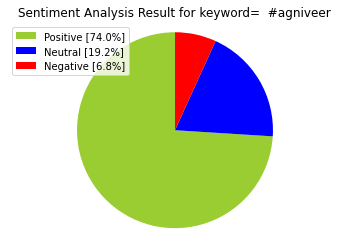

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(len(tw_list))

,0,text
0,"RT @ippatel: Not just with IAF #Agniveer, HCS ...",not just with iaf agniveer hcs prelims exam...
1,RT @BJYM: राष्ट्र सेवा से बनाएं उज्जवल भविष्य!...,join in...
2,RT @NYKS_Odisha: NYK Koraput\nAGNIPATH SCHEME\...,nyk koraput agnipath scheme iec materials dis...
3,RT @Raziyak00018580: Special Registration Camp...,special registration camp was organised for a...
6,RT @RituRathaur: Mohd Jallauddin Retd Sub insp...,mohd jallauddin retd sub inspector has been a...
...,...,...
494,#Agniveer \n#agniveerrecruitmentscheme \n#Agni...,agniveer agniveerrecruitmentscheme agnipa...
496,RT @vineetharajput: #Agnipath is the beginning...,agnipath is the beginning of a new era in in...
497,RT @sudhikshasingh1: #Agnipath is the beginnin...,agnipath is the beginning of a new era in in...
498,RT @ROSHANLAL007: #Agnipath is the beginning o...,agnipath is the beginning of a new era in in...


In [ ]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(len(tw_list))

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @ippatel: Not just with IAF #Agniveer, HCS ...",not just with iaf agniveer hcs prelims exam...,0.400000,1.000000,positive,0.000,0.924,0.076,0.2023
1,RT @BJYM: राष्ट्र सेवा से बनाएं उज्जवल भविष्य!...,join in...,0.000000,0.000000,positive,0.000,0.820,0.180,0.2960
2,RT @NYKS_Odisha: NYK Koraput\nAGNIPATH SCHEME\...,nyk koraput agnipath scheme iec materials dis...,0.000000,0.000000,positive,0.000,0.867,0.133,0.3818
3,RT @Raziyak00018580: Special Registration Camp...,special registration camp was organised for a...,0.357143,0.571429,positive,0.000,0.838,0.162,0.4019
6,RT @RituRathaur: Mohd Jallauddin Retd Sub insp...,mohd jallauddin retd sub inspector has been a...,0.000000,0.000000,negative,0.315,0.685,0.000,-0.8316
...,...,...,...,...,...,...,...,...,...
494,#Agniveer \n#agniveerrecruitmentscheme \n#Agni...,agniveer agniveerrecruitmentscheme agnipa...,0.000000,0.000000,positive,0.000,0.714,0.286,0.4215
496,RT @vineetharajput: #Agnipath is the beginning...,agnipath is the beginning of a new era in in...,0.578788,0.418182,positive,0.000,0.679,0.321,0.8402
497,RT @sudhikshasingh1: #Agnipath is the beginnin...,agnipath is the beginning of a new era in in...,0.578788,0.418182,positive,0.000,0.667,0.333,0.8402
498,RT @ROSHANLAL007: #Agnipath is the beginning o...,agnipath is the beginning of a new era in in...,0.578788,0.418182,positive,0.000,0.679,0.321,0.8402


In [ ]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,68,48.23
neutral,66,46.81
negative,7,4.96
